<a href="https://colab.research.google.com/github/GeneSiriviboon/LPS_SQC_2024_GeneSiriviboon/blob/main/LPS_SQC_2024_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Short Course 2024 - Day 1

# Numerical Simulation of Quantum Systems with Python

Welcome to our hands-on exercise!

This Jupyter notebook will guide you through a few of the basics of Python, packages, QuTiP, and go on to recreate some of what you saw in class today.

**Remember to save a copy of this file to your own Google drive before you start working on it.**

# Python Basics


## Intro to Python

Python is a C-like programming language popular in science. We don't have the time to go over its syntax today but hopefully you've either used it or it's similar enough to something you've worked with before.

We'll just highlight three things here that should be enough to do the exercises below: variable assignment, lists, and for loops.


In [ ]:
# Variable assignment
a = 5
print('a =',a)
a = 6
print('a =',a)
a += 2
print('a =',a)

In [ ]:
# Lists
b = [1, 2, 3]
print('b =',b)
b = [1, 2, 3] + [3, 2, 1]
print('b =',b)
b += [4]
print('b =',b)

In [ ]:
# For loops
b = [1, 2, 3] + [3, 2, 1]
print('b =',b)
print()
for m in range(6) :
  print('b[%d] = ' % m,b[m])
print()
for bi in b :
  print(bi,end='')
print()
c = [bi**2 for bi in b]
print('c =',c)

## Packages

Python can do the basics of programming by itself (variables, functions, lists, etc) but some of its real power comes from packages.

A package is a collection of functions and definitions that expands the scope of what you can do, whether it's by adding plotting capabilities, dedicated math and science functions, or functions for working with quantum mechanics.

To see this in action, run the following bit of code:

In [ ]:
import numpy as np

from scipy import special
from matplotlib.lines import Line2D
from matplotlib import colormaps

import matplotlib.pyplot as plt
%matplotlib inline



There are three different ways of importing packages here. The first line is the most straightforward. It imports the contents of the package NumPy with the name `np`, so now some function `func()` can be accessed as `np.func()`

NumPy is a very useful package for any kind of numerical and scientific work, with a lot of capabilities including functions for vectors and n-dimensional tensors. You can see documentation for it [here](https://numpy.org/doc/stable/).

For instance, it includes a variety of linear algebra functions. Can you figure out what the following code does?

In [ ]:
v = np.array([1,1,1,2,3])
print("v=",v)
print("||v||_{m} = ")
for m in [1, 2, 100] :
  print(m,":",np.linalg.norm(v,m))

The second block above imports a subset of a package.

For instance, here, SciPy includes a package called `special` that contains a number of special functions we often use in physics. Since we didn't specify a name, they can be accessed as `special.func()`, like this:

In [ ]:
print([special.gamma(x) for x in range(1,6)])

Finally, the third block combines both. Here, we are importing the subpackage pyplot out of matplotlib as `plt`.

(The line following the import command gives the notebook some instructions about how to display the plots we'll create. Don't worry about it too much)

You can see some plotting tutorials [here](https://matplotlib.org/stable/tutorials/index.html) and a reference for matplotlib [here](https://matplotlib.org/stable/api/index).

Let's take a look at a sample plot:

In [ ]:
pi = np.pi
x = np.linspace(0,2*pi,62)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

plt.xlabel('x')
plt.ylabel('y')

plt.xlim([0,2*pi])
plt.ylim([-1,1])

plt.legend(['sin(x)', 'cos(x)'])

# QuTiP

QuTiP is a package built for numerical calculations with quantum mechanics.

At the end of the day almost all of QM is just linear algebra: in principle you could do all of the work with vectors and matrices. But this is confusing, espcially when we deal with multiple quantum objects; QuTiP handles all of the awkward accounting that comes along with it.

Normally, we import QuTiP just as we do any other package. There is a small complication to do with our use of Colab: QuTiP is a somewhat niche package, so it doesn't come pre-installed on the computers that Google lets us use. This means we have a two line process, the first line installing the package on the computer, and the second importing it into this particular notebook.

(this doesn't make much sense here, but if you were installing python on your own computer it would: you would run (a version of) the first line in the terminal, once, while the second line would show up, as normal, in any notebook you write)

The documentation for QuTiP, including its functions and how to run them, is available [here](https://qutip.org/index.html).

In [ ]:
!pip install qutip

from qutip import*

Note that we see another way of importing packages here: we're putting them into the global environment. That means that if we want to run function `qfunc` out of QuTiP, we don't need to preface it with anything, we just run `qfunc()`.

## States and vectors

What can QuTiP do? First, it can represent vectors. Remember, we wrote those as:

$|\psi\rangle = \left(
  \begin{matrix}\cos\frac{\theta}{2} \\
  e^{i\phi}\sin\frac{\theta}{2} \end{matrix}
  \right) =
  \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle
$

To create a spin state like this, use the command

`spin_coherent(1/2,` $\theta$ `,`$\phi$ `)`

Here, the first parameter, 1/2, is telling QuTiP we want a spin-half object; that's physics-speak for a two-component vector. In physics we call these components $|+\frac{1}{2}\rangle$ and $|-\frac{1}{2}\rangle$, in quantum computing we call them $|0\rangle$ and $|1\rangle$.

(more generally, a spin-$m$ object can have any of $2m+1$ states, labeled $|-\frac{m}{2}\rangle$, $|-\frac{m}{2}+1\rangle$, ..., $|+\frac{m}{2}\rangle$; in quantum computing we almost always use spin-half, so don't worry about this too much)

The second and third parameters, $\theta$, $\phi$, are the same ones in the formula above. Let's see this in action:

In [ ]:
th = pi/3
phi = pi/4

print('theta =',th)
print('phi =',phi)
print('cos(theta/2) =',np.cos(th/2))
print('exp(i*phi)*sin(theta/2) =',np.exp(1j*phi)*np.sin(th/2))
print()

psi = spin_coherent(1/2,th,phi)

print(psi)

The object printed out at the bottom here is the state vector, as represented by QuTiP. Note that its components are what we expect! You can play with $\theta$ and $\phi$ and see that this remains true.

Note that it has some other properties.:

`shape` is simply the shape of the linear algebra object used to represent it: `shape = (m,n)` means an $m\times n$ matrix; here, a two component vector is indead of the shape $2\times1$.

`dim` is related to this, a bit more complicated, we'll talk about it later.

`type = ket` tells us that this is a $|\rm ket\rangle$ object, i.e. a vector.

### Knowledge Check:  $\langle\psi|$

What would the representation of $\langle\psi|$ in QuTiP look like?

* (A)
```
Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[0.8660254 +0.j         0.35355339+0.35355339j]]
```
* (B)
```
Quantum object: dims = [[2], [1]], shape = (2, 1), type = bra
Qobj data =
[[0.8660254 +0.j        ]
 [0.35355339+0.35355339j]]
```
* (C)
```
Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[0.8660254 +0.j         0.35355339-0.35355339j]]
```
* (D)
```
Quantum object: dims = [[2], [1]], shape = (2, 1), type = bra
Qobj data =
[[0.8660254 +0.j        ]
 [0.35355339-0.35355339j]]
```


### Named States
Let's try looking at a few of these states we saw in class:

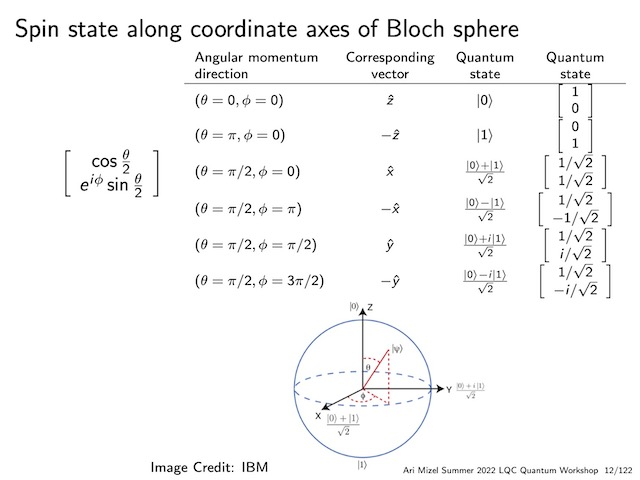

In [ ]:
statenames = ['+z', '-z', '+x', '-x', '+y', '-y']
statepars = [(0,0), (pi,0), (pi/2,0), (pi/2,pi), (pi/2,pi/2), (pi/2,3*pi/2)]
states = {name:spin_coherent(1/2,pars[0],pars[1]) for name,pars in zip(statenames,statepars)}
for x in statenames :
  print('State:',x)
  print(states[x])
  print()

## Measurement

One thing we want to do is measure them. In QuTiP, this is done with the function

`measurement.measure(state,sigmaz())`

Here, `state` is state we want to measure.

The second parameter, `sigmaz()`, is telling the function what we want to measure. In class we just talked about spin up and spin down, which are measured with the operator `sigmaz()`. (We'll see about operators later)

Let's see this in action:

In [ ]:
psi = states['+x']

print('Our state is +x:')
print(psi)

for i in range(1,6) :
  print()
  print('Measurement #%d:' % i)
  print(measurement.measure(states['+x'],sigmaz()))

You can see that the measurement returns two objects:

The first one is a number, which is either 1 or -1 - this is simply the result of the measurement.

The second object is a qubit state. What does it mean?

As you may be able to figure out, it's the state of the qubit after the measurement - measurement collapses the qubit into either the up or down state, depending on what we measured.

Another function available in QuTiP is

`measurement.measurement_statistics(state, sigmaz())`

Since the results of a quantum measurement are probabilistic, it's useful to get the statistics of many measurements. This function lets us do it.

In [ ]:
for statename in [ '+x', '+z'] :
  print('For an initial state',statename,':')
  psi = states[statename]
  M = measurement.measurement_statistics(psi,sigmaz())
  for i in range(3) :
    print('M[%d] = ' % i)
    print(M[i])
  print()

When we run `measurement_statistics` we get back three lists

* The first is a list of possible outcomes (here, -1 and 1)
* The second is a list of corresponding qubit states after each measurement outcome.
* The final list is the probability of each of these outcomes.

Note the difference between the initial states +z and +x.

### Knowledge Check: Measurement Dependence

Looking at the first two components of the `measurement_statistics` output, what do they depend on?

* (A) Only the initial state
* (B) Only the measurement operator
* (C) Both the initial state and the measurement operator

### Knowledge Check: Measurement Operators

Let's say we have a state $|+X\rangle$. What's faster, calculating its measurement statistics in the **X** direction or **Z** direction?

* (A) `measurement.measurement_statistics(states['+x'],sigmax())`
* (B) `measurement.measurement_statistics(states['+x'],sigmaz())`
* (C) There's no difference.

### Exercise 1: Ploting probabilities

Let's try an exercise: use what we've seen above to plot the probability of measurement results in a qubit prepared in a state $|\theta,\phi\rangle$.

In [ ]:
# Here x is a vector containing numbers from 0 to pi
x = np.linspace(0.,pi,31)

### Your Code here ####

### a list of the probabilities of measuring up for a state prepared with each theta in x
Pup = []
### a list of the probabilities of measuring down for a state prepared with each theta in x
Pdn = []

In [ ]:
# Once you're done, run this code blcok, and it'll plot those two lists as a
# function of x. (if you have the time and inclination, you can try to
# figure out this code, too, and customize it in various ways)

plt.plot(x,Pup)
plt.plot(x,Pdn)
plt.xlabel('$\\theta$')
plt.ylabel('P')
plt.xlim([0,pi])
plt.ylim([0,1])
plt.legend(['Up', 'Down'])

## Visualizing the Bloch sphere

One neat function QuTiP provides is the ability to generate the plots you've seen in class. Let's do this here:

In [ ]:
statecolors = ['blue','dodgerblue','red','pink','green','lime']

fig = plt.figure()
b = Bloch(fig=fig)
b.add_states([states[name] for name in statenames])
b.vector_color = statecolors

b.render()
plt.legend([Line2D([0], [0], color=c) for c in statecolors],
           ['$'+n+'$' for n in statenames])


Here,

`Bloch()` creates a "Bloch sphere" object,

`add_states()` is a function that lets you add vectors representing states to the sphere object.

`vector_color` is a list of colors for these vectors. If you add more states than colors, the plot will cycle through them.

`make_sphere()` tells the object to plot itself.

You can see more about these commmands [here](https://qutip.org/docs/latest/guide/guide-bloch.html).

The last two lines are a bit of matplotlib trickery to show the legend; if you want to understand them you can look [here](https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html).

## Operators and rotations

Now that we've figured out states and vectors, let's look at rotations.

To start, let's look at what we've called $X$, and in QuTiP (or physics) is called `sigmax()` (or $\sigma_x$):

In [ ]:
print(sigmax())

This is what an operator looks like in QuTiP. Note that it's quite similar to a vector, except:

`shape = (2,2)` now, as this is a $2\times2$ matrix rather than a vecotr.

`type = oper` tells us that this is an operator, something that acts on a state.

`isherm = True` tells us the operator is "Hermitian", which is to say it's equal to it transposed complex conjugate. This is an important distinction in physics, but we don't care about it for now.

Next, let's look at the rotations, $R_{x}(\theta), R_{y}(\theta), R_{z}(\theta)$.

These have the distinction of being given by the following formula:

$R_{x} = e^{-i\frac{\theta}{2} X}$,

and similar for $y,z$.

In QuTiP, exponentiating and operator is done by the function `expm()`. To make things easier, let's define some functions:

In [ ]:
def Rx(theta) :
  return (-1j*sigmax()*theta/2).expm()
def Ry(theta) :
  return (-1j*sigmay()*theta/2).expm()
def Rz(theta) :
  return (-1j*sigmaz()*theta/2).expm()

Let's write up the important rotations and see what they do:

In [ ]:
specialopnames = ['X', 'Y', 'Z', 'S', 'T', 'H']

specialops = [ 1j*Rx(pi), 1j*Ry(pi), 1j*Rz(pi),
              Rz(pi/2), Rz(pi/4), 1j*Rx(pi)*Ry(pi/2) ]

for name,op in zip(specialopnames,specialops) :
  print(name)
  print(op)
  print()

And let's plot there. Here, we'll start out the

In [ ]:
psi0list = [spin_coherent(1/2,0,0), spin_coherent(1/2,pi/2,0), spin_coherent(1/2,pi/2,pi/2) ]
psi0names = ['+z','+x','+y']

fig = plt.figure(figsize=[15, 8])
for m,psi0 in enumerate(psi0list) :
  for n,op in enumerate(specialops) :
    b = Bloch(fig=fig,axes=fig.add_subplot(3,6,6*m+n+1, projection='3d'))
    b.add_states([psi0,op*psi0])
    b.vector_color = ['r','b']
    b.render()
    if m == 0 :
      plt.annotate(specialopnames[n],
                   (0.5,1.2),xycoords='axes fraction',fontsize=20)
    if n == 0 :
      plt.annotate('$|'+psi0names[m]+'\\rangle$',
                   (-0.5,0.5),xycoords='axes fraction',fontsize=20)

### Knowledge Check: Applying Rotations

Let's say I want start with a state $|\psi\rangle$, apply the rotation $R_{x}(0.3)$ and then apply $R_{y}(1.65)$. Which will be faster?

* (A)
```
psi = spin_coherent(1/2,0,0)
psi = Rx(0.3)*psi
psi = Rx(1.65)*psi
```
* (B)
```
psi = spin_coherent(1/2,0,0)
U = Rx(1.65)*Rx(0.3)
psi = U*psi
```
* (C) They'll be the same.



### Exercise 2: Plotting rotation

Now, it's your turn: let's plot out a rotation process along the Bloch sphere.

Let's compare two processes to each other.

* In Both cases, we'll start in the initial state $|+z\rangle$.
* Then, we'll rotate by $\pi/2$ around X.
* Then, we'll rotate around Z by either:
  * $\pi/2$
  * $3\pi/2$
* Then, we'll rotate by $\pi/2$ around Y.

I'll set up the plotting for you, and let you generate the list of states to show on the Bloch sphere.

Finally, look at the results and what the difference is!

In [ ]:
# Your code goes here!

# This should be the first list of states to plot on the Bloch sphere
statelist1 = []

# Your code goes here!

# This should be the second list of states to plot on the Bloch sphere
statelist2 = []

In [ ]:
# Once you're done, run this code blcok, and it'll turn those two lists into a
# graphic representation. (if you have the time and inclination, you can try to
# figure out this code, too, and customize it in various ways)

def twoBlochs(list1, list2) :
  f1 = plt.figure(figsize=[10,5])
  for m,statelist in enumerate([list1,list2]) :
    b = Bloch(fig=f1,axes=f1.add_subplot(1,2,m+1, projection='3d'))
    b.add_states(statelist)
    b.vector_color = colormaps['cool'](np.linspace(0,1,len(statelist)))
    b.make_sphere()


twoBlochs(statelist1,statelist2)

## Multiple spins in QuTiP

So far we've just looked at a single qubit. But you can't do a lot of calculations with a single qubit - we need to learn how to have more.

Here, we'll see how that is done in QuTiP.

First, to get it out of the way, let's just define the $|0\rangle$ and $|1\rangle$ states for a single qubit:

In [ ]:
up = spin_coherent(1/2,0,0)
dn = spin_coherent(1/2,pi,0)
print(up)
print(dn)
kets = [up,dn]

And next, let's add them up and see what happens. The basic commands to do this in QuTiP is `tensor`; this refers to "tensor product", which is technically what we're doing here.

The command works like this:

```
tensor(q1, q2, q3, ...)
```
or
```
tensor([q1, q2, q3, ...])
```

Where q1, q2, ... are single-qubit objects.

In [ ]:
for q1 in [0,1] :
  for q2 in [0,1] :
    print('(Q1,Q2) =',(q1,q2))
    print(tensor(kets[q1],kets[q2]))
    print()


Take a look at what we've found here.

The actual data is what you'd expect from class - we've turned the four different options for two qubits (00,01,10,11) and converted them into a single four-component vector.

As you might expect, `shape = (4,1)`, because we have a $4\times1$ vector now.

But, note what `dims` looks like. Before, it tracked the shape of the object. Now, we see that it is more complicated - instead of `[[4], [1]]` we see  we see `[[2, 2], [1, 1]]`. This tells us that our four-component vector is made up of two 2-component vectors, essentially.

### Knowledge Check: Multiple Qubit Scaling

What is the the `shape` of a three-qubit ket?

* (A) (6,1)
* (B) (8,1)
* (C) (10,1)
* (D) (16,1)

## Operations on multiple spins

The tensor function can also be used to multiply rotations. Thus, `tensor(X,X)` is a two-qubit operation that applies X to the first qubit and X to the second qubit:

In [ ]:
X1 = 1j*Rx(pi)
print(tensor(X1,X1))

In this context, we should mention the *qeye(n)* function, read as q-I, which creates the quantum identitiy operation for a qubit of dimension n.

In [ ]:
I1 = qeye(2)

psi0 = tensor(kets[0],kets[0])
print('|00>')
print(psi0)
print()

print('(X I)|00> = |10>')
print(tensor(X1,I1)*psi0)
print()
print('(I X)|00> = |01>')
print(tensor(I1,X1)*psi0)
print()
print('(X X)|00> = |11>')
print(tensor(X1,X1)*psi0)

There is also a way to directly define a rotation from its matrix. We'll use that to define the important operation CNOT, below.

This is done by casting the matrix corresponding to the operator into the `Qobj` class, which is the basic quantum object class.

However, after that we must also set the `dims` parameter, so that QuTiP knows that CNOT is an operator that acts on two qubits, rather than on one 4-component quantum object (a spin 3/2 vector, if you remember what we mentioned above)

In [ ]:
CNOT = Qobj([[1,0,0,0],
             [0,1,0,0],
             [0,0,0,1],
             [0,0,1,0]],
            dims = [[2,2], [2,2]])
print('CNOT')
print(CNOT)
print()

print('CNOT|00> = |00>')
print(CNOT*tensor(kets[0],kets[0]))
print()
print('CNOT|10> = |11>')
print(CNOT*tensor(kets[1],kets[0]))

### Knowledge Check: CNOT as a Tensor

Instead of defining CNOT from a matrix as above, can we rewrite it as a tensor product?

* (A) No
* (B) Yes, we can pick some pair of operators so that `CNOT = tensor(op1,op2)`
* (C) A Secret Third Thing

## Entanglement

Finally, let's have a hint of what's coming, and what makes quantum computers powerful.

We've combined two qubits here with the `tensor` function. The opposite function is `ptrace`, or "partial trace", which allows us to extract what each single qubit looks like.

Let's take a look:

In [ ]:
psi0 = tensor(kets[0],kets[1])
print(psi0)
psi0q1 = psi0.ptrace(0)
psi0q2 = psi0.ptrace(1)
twoBlochs([psi0q1],[psi0q2])

This works if we rotate these qubits, as well:

In [ ]:
psi1 = tensor(Rx(pi/4),Rx(pi))*psi0
psi1q1 = psi1.ptrace(0)
psi1q2 = psi1.ptrace(1)
twoBlochs([psi1q1],[psi1q2])

But now, observe what happens when we apply a CNOT:


In [ ]:
psi2 = CNOT*psi1
psi2q1 = psi2.ptrace(0)
psi2q2 = psi2.ptrace(1)
twoBlochs([psi2q1],[psi2q2])

The arrows have shrunk! What does that mean?

We'll undertand later this week.